# 1. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# 2. Understand The Data

In [2]:
data = pd.read_csv('datasets_obes.csv')
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<Axes: xlabel='NObeyesdad', ylabel='count'>

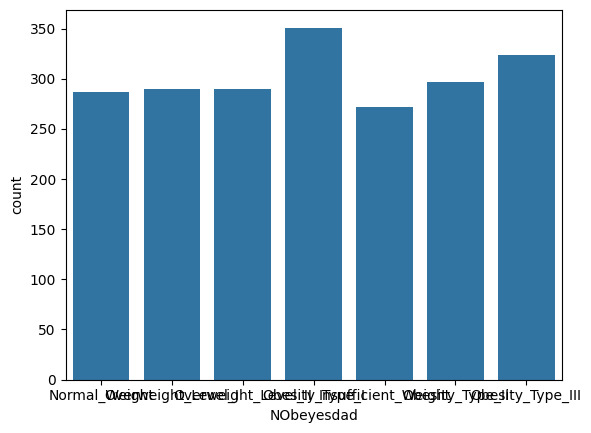

In [5]:
sns.countplot(x= data["NObeyesdad"])

# 3. Preprocessing

In [6]:
columns_num = data.select_dtypes(include=['float64']).columns
columns_num

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [7]:
columns_num = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

## Standart Scaler

In [8]:
standard_scaler = StandardScaler()

# Fit dan transformasi hanya pada kolom yang dipilih
data_scaled_standard = data.copy()
data_scaled_standard[columns_num] = standard_scaler.fit_transform(data[columns_num])

# Tampilkan hasil scaling
data_scaled_standard.head(5)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,-0.522124,-0.875589,-0.862558,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,-1.188039,0.561997,no,Public_Transportation,Normal_Weight
1,Female,-0.522124,-1.947599,-1.168077,yes,no,1.088342,0.404153,Sometimes,yes,1.618759,yes,2.339750,-1.080625,Sometimes,Public_Transportation,Normal_Weight
2,Male,-0.206889,1.054029,-0.366090,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,1.163820,0.561997,Frequently,Public_Transportation,Normal_Weight
3,Male,0.423582,1.054029,0.015808,no,no,1.088342,0.404153,Sometimes,no,-0.013073,no,1.163820,-1.080625,Frequently,Walking,Overweight_Level_I
4,Male,-0.364507,0.839627,0.122740,no,no,-0.785019,-2.167023,Sometimes,no,-0.013073,no,-1.188039,-1.080625,Sometimes,Public_Transportation,Overweight_Level_II


## Minmax Scaler

In [9]:


# Inisialisasi scaler
minmax_scaler = MinMaxScaler()
data_scaled_minmax = data.copy()
data_scaled_minmax[columns_num] = minmax_scaler.fit_transform(data[columns_num])

data_scaled_minmax.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,0.148936,0.320755,0.186567,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.000000,0.5,no,Public_Transportation,Normal_Weight
1,Female,0.148936,0.132075,0.126866,yes,no,1.0,0.666667,Sometimes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,0.191489,0.660377,0.283582,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.666667,0.5,Frequently,Public_Transportation,Normal_Weight
3,Male,0.276596,0.660377,0.358209,no,no,1.0,0.666667,Sometimes,no,0.5,no,0.666667,0.0,Frequently,Walking,Overweight_Level_I
4,Male,0.170213,0.622642,0.379104,no,no,0.5,0.000000,Sometimes,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
columns = data.select_dtypes(include=['category','object']).columns
columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [11]:
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS']

In [12]:
data2 = pd.get_dummies(data, columns=columns, dtype=int)
data2.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
column_to_encode = 'NObeyesdad'
data2[column_to_encode] = encoder.fit_transform(data2[column_to_encode])


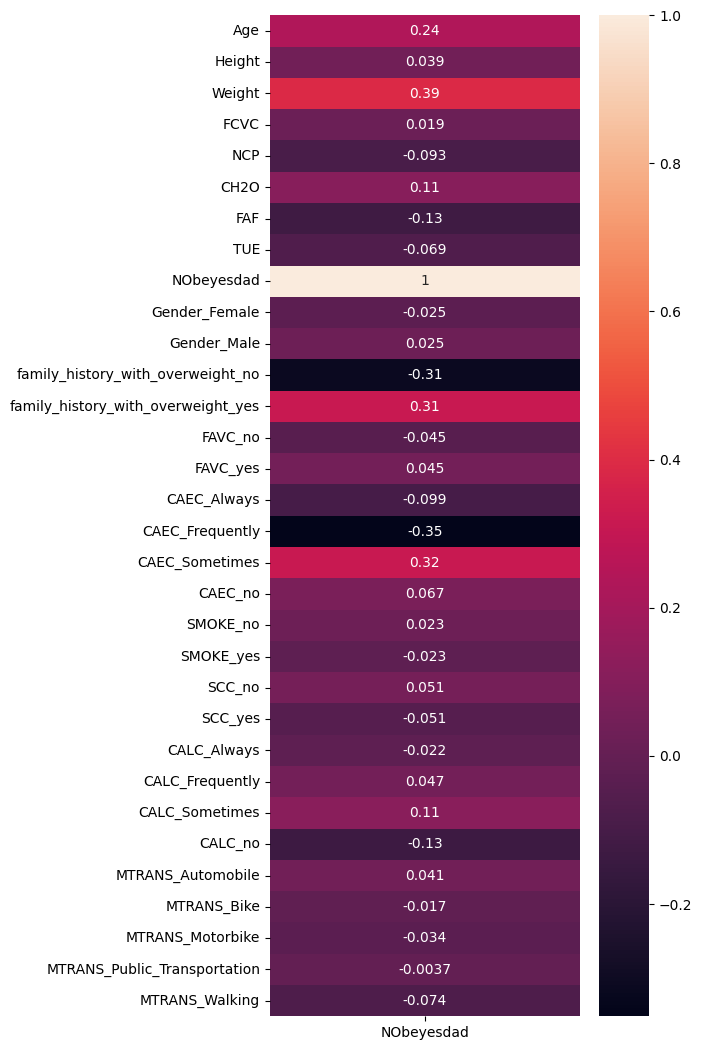

In [14]:
correlation_matrix = data2.corr()

# Extract the correlation values for the 'G3' column
correlation_with_NObeyesdad = correlation_matrix['NObeyesdad']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_NObeyesdad.to_frame(), annot=True, cbar=True)
plt.show()

In [15]:
THRESHOLD = 0.000005
obes_corr = data2.corr()["NObeyesdad"]
data3 = data2.copy()
for key, value in obes_corr.items():
  if abs(value) < THRESHOLD:
    data3.drop(columns= key, inplace=True)

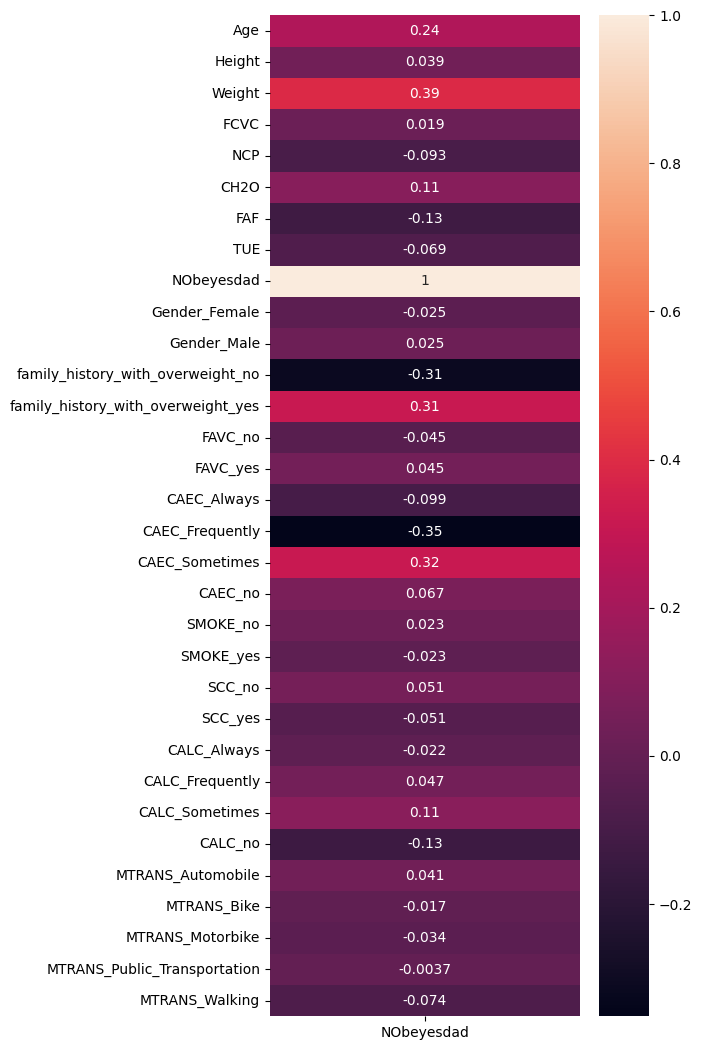

In [16]:
correlation_matrix = data3.corr()

# Extract the correlation values for the 'G3' column
correlation_with_NObeyesdad = correlation_matrix['NObeyesdad']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_NObeyesdad.to_frame(), annot=True, cbar=True)
plt.show()

In [17]:
data3.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,1,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,1,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6,0,...,0,0,0,1,0,0,0,0,1,0


## Split

In [18]:
X = data3.drop(columns=["NObeyesdad"])
y = data3["NObeyesdad"]

In [19]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1295,38.148845,1.557808,79.661693,2.000000,3.000000,1.274774,0.000000,0.000000,1,0,...,0,0,0,1,0,1,0,0,0,0
1627,40.366238,1.722396,109.349025,2.281963,3.770379,1.000000,1.330519,0.000000,0,1,...,0,0,0,0,1,1,0,0,0,0
1388,39.648946,1.572791,80.086524,2.071622,2.977909,1.468297,0.000000,0.000000,1,0,...,0,0,0,0,1,1,0,0,0,0
1318,23.237302,1.761008,97.829344,2.000000,3.000000,2.988771,2.429923,1.978043,0,1,...,0,0,0,0,1,0,0,0,1,0
648,22.547298,1.722461,51.881263,2.663421,3.000000,1.041110,0.794402,1.391948,1,0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
model = LogisticRegression()

model.fit(X_train, y_train)

c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

,y_test,y_pred
1730,3,3
259,2,4
966,5,2
1911,4,4
1815,4,4


In [22]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix\n", cm)

# Print the accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion matrix
 [[51 13  0  0  0  1  0]
 [10 30  0  0  0 12  5]
 [ 0  1 38  6  6  7  9]
 [ 0  0  3 50  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  6 10  2  0 33  6]
 [ 0  4 12  5  1  6 27]]
Accuracy Score:  0.7044917257683215


In [23]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Inisialisasi model
model = LogisticRegression(max_iter=1000)

# Parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': np.logspace(-4, 4, 10),
    'solver': ['liblinear', 'saga']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit model dengan Grid Search
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Gunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi performa
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'C': 1291.5496650148827, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7802099977174162

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.76      0.56      0.65        57
           2       0.72      0.78      0.75        67
           3       0.91      1.00      0.95        53
           4       0.99      1.00      0.99        69
           5       0.66      0.72      0.69        57
           6       0.64      0.58      0.61        55

    accuracy                           0.81       423
   macro avg       0.80      0.80      0.80       423
weighted avg       0.80      0.81      0.80       423



c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Definisikan model dan parameter grid untuk masing-masing
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    }
}

# Iterasi untuk Grid Search pada setiap model
for model_name, config in models.items():
    print(f"\nPerforming Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['param_grid'],
        cv=5,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    # Fit Grid Search
    grid_search.fit(X_train, y_train)
    
    # Tampilkan hasil terbaik
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print(f"Best Score for {model_name}:", grid_search.best_score_)
    
    # Evaluasi model terbaik
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))



Performing Grid Search for RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score for RandomForest: 0.9419626709743122

Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        65
           1       0.71      0.98      0.82        57
           2       0.98      0.96      0.97        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       0.96      0.82      0.89        57
           6       0.94      0.84      0.88        55

    accuracy                           0.93       423
   macro avg       0.94      0.93      0.93       423
weighted avg       0.94      0.93      0.93       423


Performing Grid Search for SVM...
Fitting 5 folds for each of 32 candidates, totall

In [25]:
slebew = SVC(C= 100,gamma= 'scale', kernel= 'linear')
slebew.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [26]:
y_pred = slebew.predict(X_test)

# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

,y_test,y_pred
1730,3,3
259,2,2
966,5,6
1911,4,4
1815,4,4


In [27]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix\n", cm)

# Print the accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion matrix
 [[64  1  0  0  0  0  0]
 [ 5 52  0  0  0  0  0]
 [ 0  0 67  0  0  0  0]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  2  0  0  0 53  2]
 [ 0  1  2  0  0  4 48]]
Accuracy Score:  0.9598108747044918


In [28]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        65
           1       0.93      0.91      0.92        57
           2       0.97      1.00      0.99        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       0.93      0.93      0.93        57
           6       0.96      0.87      0.91        55

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [29]:
import pickle

# Simpan model ke file
with open('svc_model.pkl', 'wb') as f:
    pickle.dump(slebew, f)
print("Model berhasil disimpan.")

Model berhasil disimpan.


In [33]:
slebew.predict([[55, 1.78, 84, 3, 4, 3, 3, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]])

c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])